# Topic Summary
## for this assignment I chose two datasets, one related to trafffic collisions in LA County pulled from the Statewide Integrated Traffic Records System, and another relating to affordable housing projects pulled from the city of Los Angeles using an API. I am trying to decide which of these data sets/topics I want to explore further in my final project. I first explored the distribution of crashes by severity across geographies, and then looked in to how much funding various affordable housing projects have received in each council district in the city of LA.

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [39]:
crashes = pd.read_csv('Crashes.csv')

crashes.head()

C:\Users\nmcco\AppData\Local\Temp\ipykernel_9028\4029271629.py:1: DtypeWarning: Columns (6,7,14,15,17,26,29,30,33,42) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv('Crashes.csv')


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,81380291,2021,2021-01-04,1942,2021-01-02,1910,35203,2074,6,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.301025,34.043671
1,81380543,2021,2021-01-05,1933,2021-01-01,140,916,30,5,5,...,0,0,-,-,33.941830,-118.339783,LOS ANGELES,INGLEWOOD,-118.338821,33.941811
2,81380545,2021,2021-01-05,1933,2021-01-01,838,828,29,5,5,...,0,0,-,-,33.945438,-118.326469,LOS ANGELES,INGLEWOOD,-118.326477,33.945881
3,81380547,2021,2021-01-05,1933,2021-01-01,1228,828,36,5,5,...,0,0,-,-,33.937698,-118.326508,LOS ANGELES,INGLEWOOD,-118.326721,33.938660
4,81380897,2021,2021-01-05,1942,2021-01-01,920,38282,0638,5,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.309280,34.102161


In [40]:
print(crashes.columns.tolist())

['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE', 'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK', 'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE', 'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER', 'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY', 'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX', 'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY', 'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED', 'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL', 'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION', 'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION', 'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING', 'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT', 'NOT_PRIVATE_PROPERTY', '

In [53]:
crashes = pd.read_csv(
    'Crashes.csv',
    usecols=['CITY', 'CASE_ID', 'COLLISION_DATE', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED', 'PRIMARY_COLL_FACTOR', 'PCF_VIOL_CATEGORY', 'PEDESTRIAN_ACCIDENT', 'PED_ACTION', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING', 'COUNT_PED_KILLED', 'COUNT_PED_INJURED']
)
crashes.head()

C:\Users\nmcco\AppData\Local\Temp\ipykernel_9028\1400578374.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv(


,CASE_ID,COLLISION_DATE,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,PED_ACTION,ROAD_COND_1,ROAD_COND_2,LIGHTING,PEDESTRIAN_ACCIDENT,COUNT_PED_KILLED,COUNT_PED_INJURED,CITY
0,81380291,2021-01-02,4,0,2,A,09,A,H,-,C,NaN,0,0,LOS ANGELES
1,81380543,2021-01-01,3,0,1,A,08,A,H,-,C,NaN,0,0,INGLEWOOD
2,81380545,2021-01-01,4,0,1,A,03,A,H,-,A,NaN,0,0,INGLEWOOD
3,81380547,2021-01-01,4,0,1,A,09,A,H,-,A,NaN,0,0,INGLEWOOD
4,81380897,2021-01-01,3,0,2,A,08,A,H,-,A,NaN,0,0,LOS ANGELES


In [54]:
crashes.describe()

,CASE_ID,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,COUNT_PED_KILLED,COUNT_PED_INJURED
count,4.146000e+04,41460.000000,41460.000000,41460.000000,41460.000000,41460.000000
mean,4.775065e+07,3.431114,0.020260,1.417342,0.007356,0.083333
std,4.047263e+07,0.741519,0.149206,0.840779,0.085737,0.293652
min,9.003893e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.298680e+06,3.000000,0.000000,1.000000,0.000000,0.000000
50%,9.391788e+06,4.000000,0.000000,1.000000,0.000000,0.000000
75%,9.150704e+07,4.000000,0.000000,2.000000,0.000000,0.000000
max,9.202716e+07,4.000000,5.000000,12.000000,2.000000,6.000000


In [55]:
pd.get_dummies(crashes['COLLISION_SEVERITY']).sample(5)

,1,2,3,4
30981,0,0,0,1
17051,0,0,0,1
36302,0,0,0,1
14333,0,0,0,1
2868,0,0,0,1


In [56]:
crashes.join(pd.get_dummies(crashes['COLLISION_SEVERITY'].astype(int), prefix='severity')).loc[:, 'COLLISION_SEVERITY':].sample(5)

,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,PED_ACTION,ROAD_COND_1,ROAD_COND_2,LIGHTING,PEDESTRIAN_ACCIDENT,COUNT_PED_KILLED,COUNT_PED_INJURED,CITY,severity_1,severity_2,severity_3,severity_4
13855,1,1,0,A,11,E,H,-,C,Y,1,0,LOS ANGELES,1,0,0,0
4485,4,0,1,A,01,A,H,-,C,NaN,0,0,LOS ANGELES,0,0,0,1
32202,1,1,0,A,10,B,H,-,B,Y,1,0,DOWNEY,1,0,0,0
33438,4,0,1,A,08,A,H,-,C,NaN,0,0,LONG BEACH,0,0,0,1
12530,4,0,1,A,3,A,H,-,A,NaN,0,0,LOS ANGELES,0,0,0,1


In [61]:
pd.crosstab(crashes['CITY'], crashes['COLLISION_SEVERITY'], margins=True, normalize=True)

COLLISION_SEVERITY,1,2,3,4,All
CITY,,,,,
AGOURA HILLS,0.000000,0.000096,0.000844,0.000675,0.001616
ALHAMBRA,0.000024,0.000362,0.001809,0.005572,0.007767
ARCADIA,0.000072,0.000265,0.001544,0.003377,0.005258
ARTESIA,0.000024,0.000169,0.000458,0.000989,0.001640
AVALON,0.000000,0.000072,0.000217,0.000024,0.000314
...,...,...,...,...,...
WEST COVINA,0.000193,0.000482,0.003425,0.006223,0.010323
WEST HOLLYWOOD,0.000000,0.000362,0.001592,0.002653,0.004607
WESTLAKE VILLAGE,0.000000,0.000072,0.000217,0.000193,0.000482


In [62]:
pd.crosstab(crashes['COLLISION_SEVERITY'], crashes['CITY'], margins=True, normalize='index'
        )

CITY,AGOURA HILLS,ALHAMBRA,ARCADIA,ARTESIA,AVALON,AZUSA,BALDWIN PARK,BELL,BELL GARDENS,BELLFLOWER,...,SOUTH PASADENA,TEMPLE CITY,TORRANCE,UNINCORPORATED,VERNON,WALNUT,WEST COVINA,WEST HOLLYWOOD,WESTLAKE VILLAGE,WHITTIER
COLLISION_SEVERITY,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.001253,0.003759,0.001253,0.000000,0.003759,0.005013,0.002506,0.001253,0.006266,...,0.000000,0.000000,0.005013,0.195489,0.001253,0.002506,0.010025,0.000000,0.000000,0.005013
2,0.001020,0.003827,0.002806,0.001786,0.000765,0.002551,0.006378,0.003316,0.001531,0.004082,...,0.000510,0.001531,0.003571,0.183673,0.001531,0.000510,0.005102,0.003827,0.000765,0.004082
3,0.002621,0.005617,0.004793,0.001423,0.000674,0.006067,0.008089,0.007115,0.002696,0.009212,...,0.001947,0.002621,0.011908,0.159976,0.003820,0.002621,0.010635,0.004943,0.000674,0.008613
4,0.001197,0.009876,0.005985,0.001753,0.000043,0.003720,0.009748,0.003378,0.003720,0.011672,...,0.001625,0.000983,0.013852,0.142967,0.003976,0.001026,0.011030,0.004703,0.000342,0.008080
All,0.001616,0.007767,0.005258,0.001640,0.000314,0.004366,0.008804,0.004559,0.003136,0.010058,...,0.001592,0.001544,0.012084,0.153304,0.003642,0.001520,0.010323,0.004607,0.000482,0.007815


## Comparison of proportional collision severity across all cities in LA County. This initial visualization was very messy, so I explored other visualization options by creating a facet grid to compare all geographies besides LA City and unincorporated LA County. Because these two geographies had a much higher overall volume of crashes, I pulled them out to examine seperately as well.  


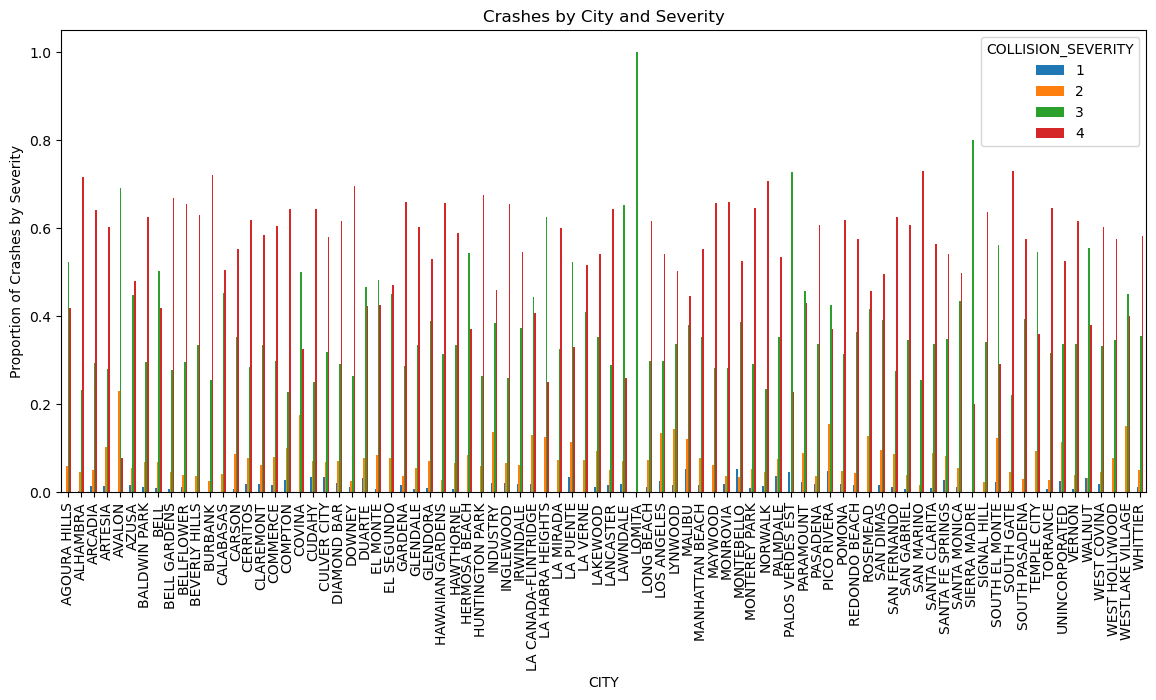

In [67]:
cross_tab = pd.crosstab(crashes['CITY'], crashes['COLLISION_SEVERITY'], margins=True, normalize='index')

if 'All' in cross_tab.index:
    cross_tab = cross_tab.drop('All')

severity_labels = {1: 'Fatal injury', 2: 'Suspected serious injury or severe injury', 3: 'Suspected minor injury or visible injury', 4: 'Possible injury or complaint of pain'}

handles, labels = ax.get_legend_handles_labels()

new_labels = [severity_labels[int(label)] if label.isdigit() else label for label in labels]

ax.legend(handles, new_labels)

plt.show()

ax = cross_tab.plot(kind='bar', figsize=(14, 6), title='Crashes by City and Severity')
ax.set_ylabel('Proportion of Crashes by Severity')

plt.show()p


In [183]:
crashes_non_LA_cities = crashes[~crashes['CITY'].isin(['LOS ANGELES', 'UNINCORPORATED'])]

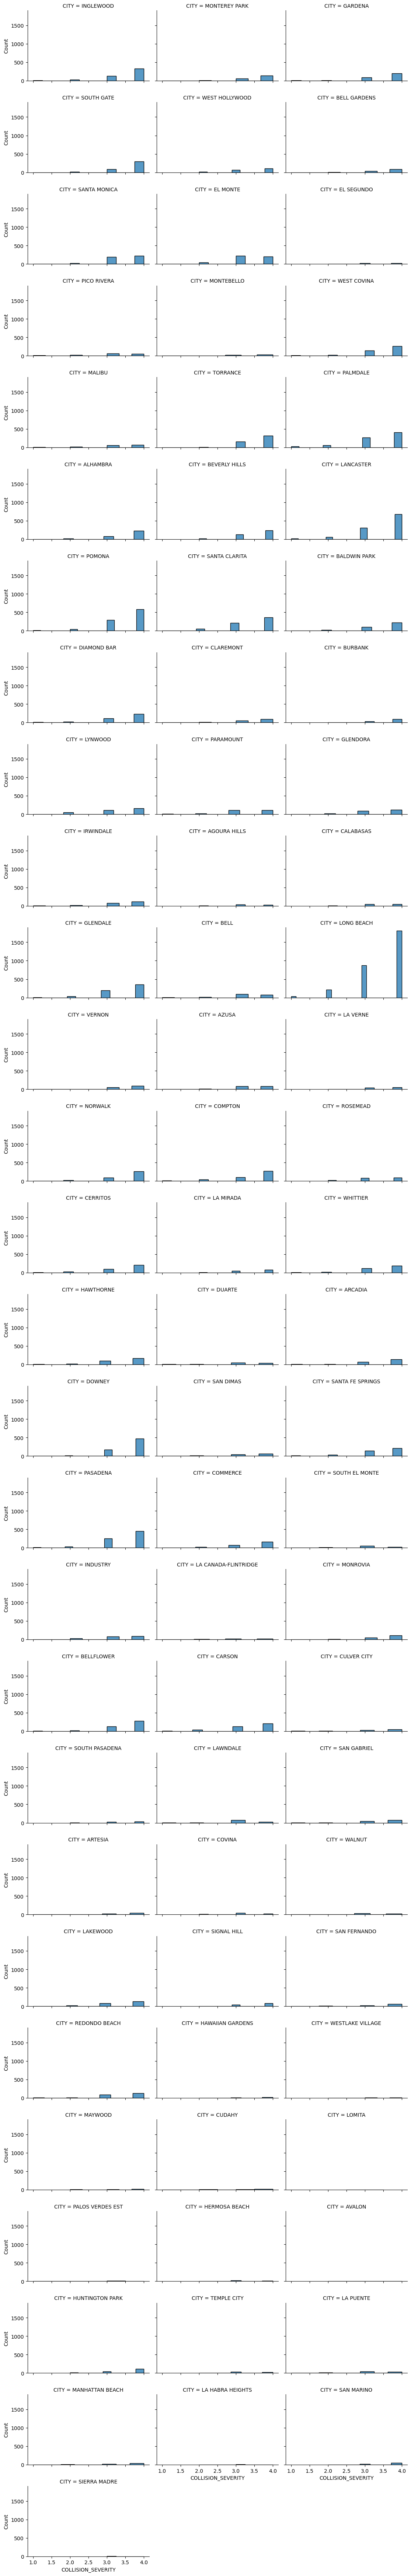

In [184]:
c = sns.FacetGrid(crashes_non_LA_cities, col="CITY", col_wrap=3, height=2.5, aspect=1.5)
c.map(sns.histplot, "COLLISION_SEVERITY")

In [76]:
crashes_LA = crashes[crashes['CITY'] == 'LOS ANGELES']

In [77]:
crashes_LA.head()

,CASE_ID,COLLISION_DATE,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,PED_ACTION,ROAD_COND_1,ROAD_COND_2,LIGHTING,PEDESTRIAN_ACCIDENT,COUNT_PED_KILLED,COUNT_PED_INJURED,CITY
0,81380291,2021-01-02,4,0,2,A,09,A,H,-,C,NaN,0,0,LOS ANGELES
4,81380897,2021-01-01,3,0,2,A,08,A,H,-,A,NaN,0,0,LOS ANGELES
5,81380924,2021-01-01,4,0,1,A,12,A,H,-,A,NaN,0,0,LOS ANGELES
6,81381026,2021-01-02,4,0,1,A,09,A,H,-,A,NaN,0,0,LOS ANGELES
7,81381192,2021-01-04,4,0,2,A,03,A,H,-,A,NaN,0,0,LOS ANGELES


In [78]:
len(crashes)

41460

In [79]:
len(crashes_LA)

12807

In [51]:
crashes_severe = crashes[crashes['COLLISION_SEVERITY'].isin([1, 2])]

In [52]:
crashes_severe.head()

,CASE_ID,COLLISION_DATE,LOCATION_TYPE,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,PED_ACTION,ROAD_COND_1,ROAD_COND_2,LIGHTING,PEDESTRIAN_ACCIDENT,COUNT_PED_KILLED,COUNT_PED_INJURED,CITY
35,81386247,2021-01-11,NaN,2,0,1,A,12,B,H,-,C,Y,0,1,LOS ANGELES
39,81386451,2021-01-11,NaN,2,0,2,A,03,A,H,-,C,NaN,0,0,INGLEWOOD
40,81386523,2021-01-08,NaN,1,1,0,A,11,E,H,-,C,Y,1,0,LOS ANGELES
41,81386600,2021-01-11,NaN,1,1,0,A,05,A,H,-,A,NaN,0,0,LOS ANGELES
54,81389667,2021-01-13,NaN,1,1,4,A,05,A,H,-,A,NaN,0,0,LOS ANGELES


In [24]:
type(crashes['PCF_VIOL_CATEGORY'])

pandas.core.series.Series

In [31]:
crashes['COLLISION_DATE'].max()

'2021-12-31'

In [32]:
crashes['COLLISION_DATE'].min()

'2021-01-01'

In [97]:
viol_cat_to_name = {
    '0': 'Unknown', '1': 'DUI/DWI', '2': 'Impeding Traffic', '3': 'Unsafe Speed', '4': 'Following too Closely', '5': 'Wrong Side of Road', '6': 'Improper Passing', '7': 'Unsafe Lane Change', '8': 'Improper Turning', '9': 'Automobile Right of Way', '10': 'Pedestrian Right of Way', '11': 'Pedestrian Violation', '12': 'Traffic Signals and Signs', '13': 'Hazardous Parking','14': 'Lights', '15': 'Brakes', '16': 'Other Equipment', '17': 'Other Hazardous Violation', '18': 'Other Than Driver (or Pedestrian)', '21': 'Unsafe Starting or Backing', '22': 'Other Improper Driving', '23': 'Pedestrian or "Other" Under the Influence of Alcohol or Drug', '24': 'Fell Asleep'
}

In [98]:
crashes_LA['PCF_VIOL_CATEGORY'] = crashes_LA['PCF_VIOL_CATEGORY'].replace(viol_cat_to_name)

C:\Users\nmcco\AppData\Local\Temp\ipykernel_9028\1219389921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_LA['PCF_VIOL_CATEGORY'] = crashes_LA['PCF_VIOL_CATEGORY'].replace(viol_cat_to_name)


In [99]:
crashes_LA.head()

,CASE_ID,COLLISION_DATE,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,PED_ACTION,ROAD_COND_1,ROAD_COND_2,LIGHTING,PEDESTRIAN_ACCIDENT,COUNT_PED_KILLED,COUNT_PED_INJURED,CITY
0,81380291,2021-01-02,4,0,2,A,Automobile Right of Way,A,H,-,C,NaN,0,0,LOS ANGELES
4,81380897,2021-01-01,3,0,2,A,Improper Turning,A,H,-,A,NaN,0,0,LOS ANGELES
5,81380924,2021-01-01,4,0,1,A,Traffic Signals and Signs,A,H,-,A,NaN,0,0,LOS ANGELES
6,81381026,2021-01-02,4,0,1,A,Automobile Right of Way,A,H,-,A,NaN,0,0,LOS ANGELES
7,81381192,2021-01-04,4,0,2,A,Unsafe Speed,A,H,-,A,NaN,0,0,LOS ANGELES


In [189]:
crashes_LA['PCF_VIOL_CATEGORY'].value_counts()

Unsafe Speed                         4435
Improper Turning                     1598
DUI/DWI                              1330
Automobile Right of Way              1292
Traffic Signals and Signs             964
Unsafe Lane Change                    838
Pedestrian Violation                  519
Pedestrian Right of Way               440
Wrong Side of Road                    322
Unknown                               280
Following too Closely                 192
Other Than Driver (or Pedestrian)     156
Unsafe Starting or Backing            148
Other Hazardous Violation              86
Improper Passing                       82
Other Improper Driving                 57
-                                      52
Hazardous Parking                       5
Other Equipment                         5
Impeding Traffic                        4
Lights                                  2
Name: PCF_VIOL_CATEGORY, dtype: int64

In [260]:
LA_viol_cat_counts = crashes_LA['PCF_VIOL_CATEGORY'].value_counts()
LA_viol_cat_counts.head()

Unsafe Speed                 4435
Improper Turning             1598
DUI/DWI                      1330
Automobile Right of Way      1292
Traffic Signals and Signs     964
Name: PCF_VIOL_CATEGORY, dtype: int64

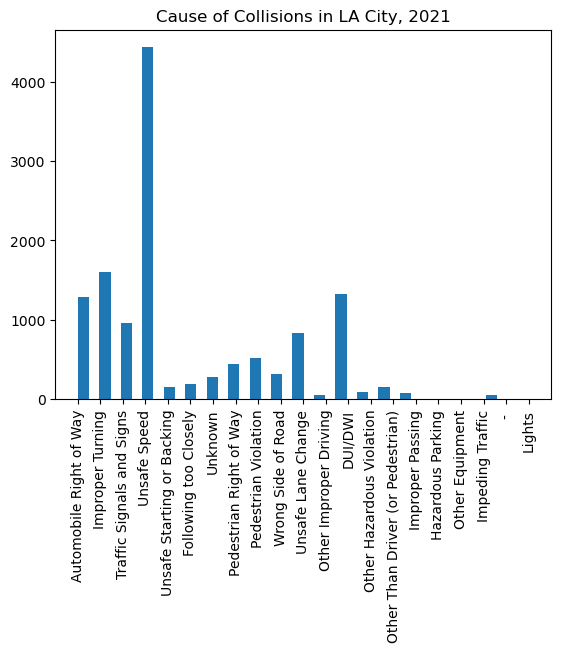

In [283]:
plt.hist(crashes_LA['PCF_VIOL_CATEGORY'], bins=len(crashes_LA['PCF_VIOL_CATEGORY'].unique()), width=0.5, align='mid')

plt.xticks(rotation=90)
plt.title("Cause of Collisions in LA City, 2021")
plt.show()

## In 2021, unsafe speeds was the leading cause of collisions across the city of Los Angeles. Improper turning and driving while under the influence of drugs or alchol rounded out the top three causes of collisions. 

In [96]:
crashes_LA['PCF_VIOL_CATEGORY'].unique()

array(['Automobile Right of Way', 'Improper Turning',
       'Traffic Signals and Signs', 'Unsafe Speed',
       'Unsafe Starting or Backing', 'Following too Closely', 'Unknown',
       'Pedestrian Right of Way', 'Pedestrian Violation',
       'Wrong Side of Road', 'Unsafe Lane Change',
       'Other Improper Driving', 'DUI/DWI', 'Other Hazardous Violation',
       'Other Than Driver (or Pedestrian)', 'Improper Passing',
       'Hazardous Parking', 'Other Equipment', '3', '8', '7', '1', '0',
       '4', '5', '6', '9', '2', 'Impeding Traffic', '- ', 'Lights'],
      dtype=object)

In [193]:
crashes_LA_city_county = crashes[crashes['CITY'].isin(['LOS ANGELES', 'UNINCORPORATED'])]

In [198]:
crashes_LA_city_county['COLLISION_SEVERITY'].value_counts()

4    10270
3     5958
2     2457
1      478
Name: COLLISION_SEVERITY, dtype: int64

In [199]:
cross_LA_cc = pd.crosstab(crashes_LA_city_county['CITY'], crashes_LA_city_county['COLLISION_SEVERITY'], margins=True, normalize='index')
cross_LA_cc.head()

COLLISION_SEVERITY,1,2,3,4
CITY,,,,
LOS ANGELES,0.025143,0.135629,0.298431,0.540798
UNINCORPORATED,0.024544,0.113279,0.336060,0.526117
All,0.024944,0.128216,0.310912,0.535929


In [ ]:
LA_cc_crashes = cross_LA_cc

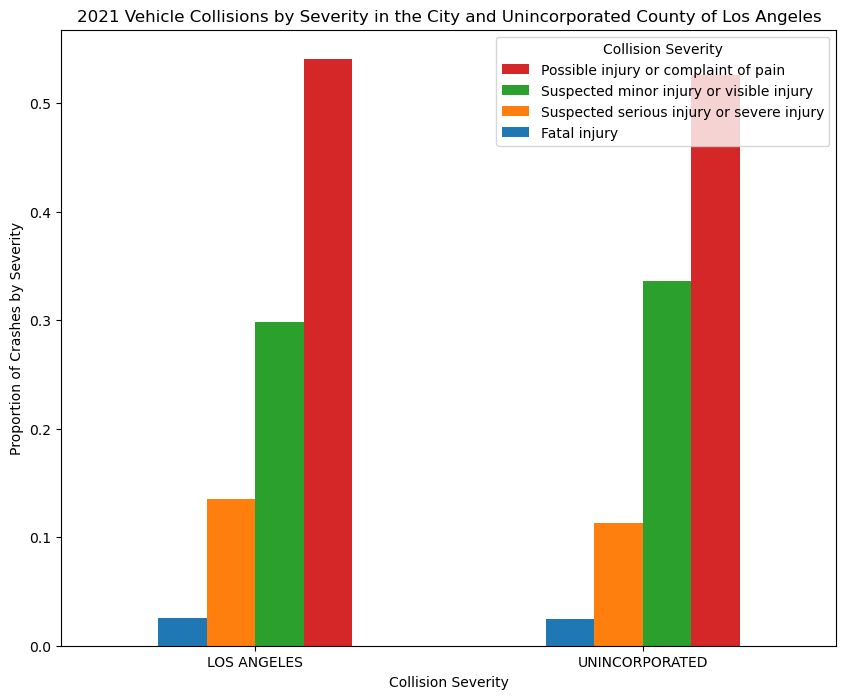

In [203]:
if 'All' in cross_LA_cc.index:
    cross_LA_cc = cross_LA_cc.drop('All')

ax = cross_LA_cc.plot(kind='bar', figsize=(10, 8), title='2021 Vehicle Collisions by Severity in the City and Unincorporated County of Los Angeles')
    
severity_labels = {1: 'Fatal injury', 2: 'Suspected serious injury or severe injury', 3: 'Suspected minor injury or visible injury', 4: 'Possible injury or complaint of pain'}

handles, labels = ax.get_legend_handles_labels()

new_labels = [severity_labels[int(label)] if label.isdigit() else label for label in labels]

handles.reverse()
new_labels.reverse()

ax.legend(handles, new_labels, title='Collision Severity')

ax.set_ylabel('Proportion of Crashes by Severity')
ax.set_xlabel('Collision Severity')
plt.xticks(rotation=0)

plt.show()

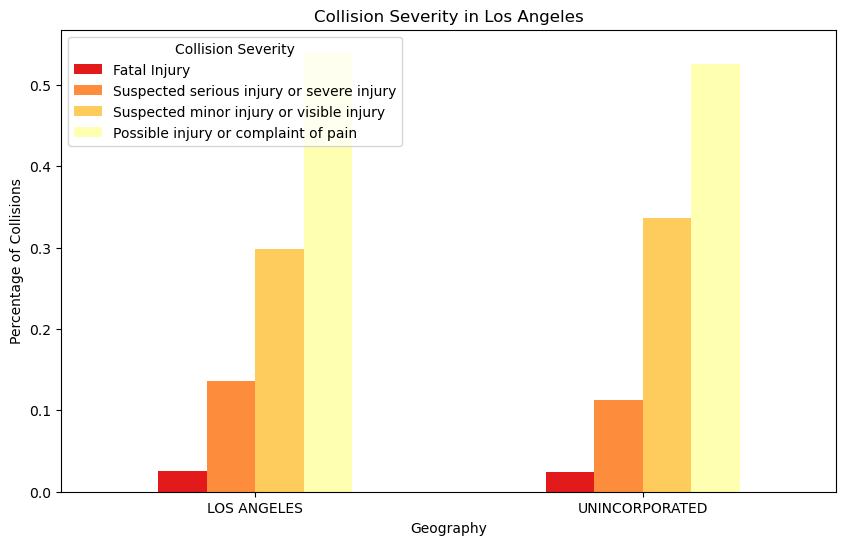

In [219]:
#Comparison of high crash geographies, LA City and unincorporated LA County, using colorblind friendly pallette from colorbrewer2.org.

colors = ['#e31a1c', '#fd8d3c', '#fecc5c', '#ffffb2']

ax = cross_LA_cc.plot(kind='bar', figsize=(10, 6), color=colors)

legend_labels = ['Fatal Injury', 'Suspected serious injury or severe injury', 'Suspected minor injury or visible injury', 'Possible injury or complaint of pain']
ax.legend(labels=legend_labels, title='Collision Severity', loc='upper left')

plt.title('Collision Severity in Los Angeles')
plt.xlabel('Geography')
plt.ylabel('Percentage of Collisions')
plt.xticks(rotation=0)

plt.show()

## LA City and Unincorporated LA County have similar distributions of crash severity. LA City experienced a slightly higher proportion of serious injuries compared to the County, which in turn had a slightly higher proportion of minor injuries. 

In [119]:
cross_severity = pd.crosstab(crashes_severe['CITY'], crashes['COLLISION_SEVERITY'], margins=True, normalize='index')
cross_severity.head()

COLLISION_SEVERITY,1,2
CITY,,
AGOURA HILLS,0.000000,1.000000
ALHAMBRA,0.062500,0.937500
ARCADIA,0.214286,0.785714
ARTESIA,0.125000,0.875000
AVALON,0.000000,1.000000


## I chose to use an API through the City of Los Angeles to access data on affordable housing projects.

In [130]:
import json
import requests
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [133]:
endpoint_url = "https://data.lacity.org/resource/4jt3-efvk.json"
response = requests.get(endpoint_url)

In [135]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"the_geom":{"type":"MultiPolygon","coordinates":[[[[-118.29795640257868,34.06161818729114],[-118.29696749319304,34.06162394147065],[-118.2969673164778,34.06157416023307],[-118.29795216596233,34.06154850303954],[-118.29795640257868,34.06161818729114]]]]},"objectid":"1","address":"3400 Wilshire blvd","name":"Robert F Kennedy Inspiration Park"}
,{"the_geom":{"type":"MultiPolygon","coordinates":[[[[-118.20109825760832,34.101337861295605],[-118.20109858582094,34.10113276338332],[-118.20098230929752


In [136]:
data = json.loads(results)
print(type(data))
print(data[:3])

<class 'list'>
[{'the_geom': {'type': 'MultiPolygon', 'coordinates': [[[[-118.29795640257868, 34.06161818729114], [-118.29696749319304, 34.06162394147065], [-118.2969673164778, 34.06157416023307], [-118.29795216596233, 34.06154850303954], [-118.29795640257868, 34.06161818729114]]]]}, 'objectid': '1', 'address': '3400 Wilshire blvd', 'name': 'Robert F Kennedy Inspiration Park'}, {'the_geom': {'type': 'MultiPolygon', 'coordinates': [[[[-118.20109825760832, 34.101337861295605], [-118.20109858582094, 34.10113276338332], [-118.20098230929752, 34.1012397891518], [-118.20092950973284, 34.10128757696016], [-118.20087356134714, 34.10133650590902], [-118.20086154866951, 34.10134665097152], [-118.20082873190228, 34.101325821557175], [-118.20109866932229, 34.10107735966642], [-118.20222265997606, 34.10004276758272], [-118.20274759256034, 34.099559575221974], [-118.2027959819914, 34.09951424167647], [-118.20284341493605, 34.09946821373548], [-118.20288987408603, 34.09942150405065], [-118.2029353464

In [137]:
pp.pprint(data[:3])

[{'address': '3400 Wilshire blvd',
  'name': 'Robert F Kennedy Inspiration Park',
  'objectid': '1',
  'the_geom': {'coordinates': [[[[-118.29795640257868, 34.06161818729114],
                                 [-118.29696749319304, 34.06162394147065],
                                 [-118.2969673164778, 34.06157416023307],
                                 [-118.29795216596233, 34.06154850303954],
                                 [-118.29795640257868, 34.06161818729114]]]],
               'type': 'MultiPolygon'}},
 {'address': '4702 N. Figueroa St',
  'name': 'SYCAMORE GROVE PARK',
  'objectid': '2',
  'the_geom': {'coordinates': [[[[-118.20109825760832, 34.101337861295605],
                                 [-118.20109858582094, 34.10113276338332],
                                 [-118.20098230929752, 34.1012397891518],
                                 [-118.20092950973284, 34.10128757696016],
                                 [-118.20087356134714, 34.10133650590902],
                  

In [139]:
pd.read_json(endpoint_url).head()

,the_geom,objectid,address,name
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",1,3400 Wilshire blvd,Robert F Kennedy Inspiration Park
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",2,4702 N. Figueroa St,SYCAMORE GROVE PARK
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",3,351 N. Gaffey St.,San Pedro Welcome Park
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",4,1015 S.Wilton PL,WILTON PLACE PARK
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",5,1780 E.Santa Ana Blvd,WATTS CULTURAL CRESCENT


In [145]:
import shapely
from shapely.geometry import MultiPolygon, Polygon
import pandas as pd

In [154]:
df_parks = pd.DataFrame(data)

# Remove the "coordinates" key and flatten the "the_geom" values
df_parks['the_geom'] = df_parks['the_geom'].apply(lambda x: x['coordinates'][0][0])

# Rename columns
df_parks = df_parks.rename(columns={'the_geom': 'geom'})

# Reorder columns
df_parks = df_parks[['address', 'name', 'objectid', 'geom']]

df_parks.head()

,address,name,objectid,geom
0,3400 Wilshire blvd,Robert F Kennedy Inspiration Park,1,"[[-118.29795640257868, 34.06161818729114], [-1..."
1,4702 N. Figueroa St,SYCAMORE GROVE PARK,2,"[[-118.20109825760832, 34.101337861295605], [-..."
2,351 N. Gaffey St.,San Pedro Welcome Park,3,"[[-118.29285760206929, 33.745998753169744], [-..."
3,1015 S.Wilton PL,WILTON PLACE PARK,4,"[[-118.31503614097477, 34.05231955176565], [-1..."
4,1780 E.Santa Ana Blvd,WATTS CULTURAL CRESCENT,5,"[[-118.24221423669567, 33.93944733661207], [-1..."


In [173]:
endpoint_url_housing = "https://data.lacity.org/resource/x4z3-2z5a.json"
response = requests.get(endpoint_url_housing)
results = response.text
print(type(results))
print(results[:500])
housing_data = json.loads(results)
housing_data = pd.DataFrame(housing_data)

<class 'str'>
[ {
  "xcoord" : "-118.25394",
  ":@computed_region_qz3q_ghft" : "22351",
  ":@computed_region_k96s_3jcv" : "817",
  ":@computed_region_kqwf_mjcx" : "15",
  "ycoord" : "33.93916",
  "apn" : "6065010054",
  "development_stage" : "READY FOR OCCUPANCY",
  ":@computed_region_2dna_qi2s" : "40",
  "housing_type" : "FAMILY",
  "site_cd" : "13",
  "ahtf_pa" : "10648 S CENTRAL AVE CA 90002",
  "leverage" : "7103994",
  ":@computed_region_tatf_ua23" : "1182",
  "developer" : "HAMPSTEAD PARTNERS, INC.",
  


In [171]:
pd.read_json(endpoint_url_housing).head()

,xcoord,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,ycoord,apn,development_stage,:@computed_region_2dna_qi2s,housing_type,site_cd,...,name,contact_phone,:@computed_region_ur2y_g4cx,construction_type,hcidla_funded,management_company,tdc,council_district,community,jobs
0,-118.25394,22351,817,15.0,33.93916,6065010054,READY FOR OCCUPANCY,40.0,FAMILY,13,...,LEEWARD APTS. (SITE 13),(323) 231-4174,7.0,REHAB,0.00,"ALPHA PROPERTY MANAGEMENT, INC.",17312930.00,15,WATTS,NaN
1,-118.25748,22727,712,13.0,34.01115,5114014020,UNDERCONSTRUCTION,6.0,SPECIAL NEEDS,5,...,FLORENCE MILLS (SITE 5),(714) 533-3450,7.0,NEW CONSTRUCTION,9389115.63,BARKER MANAGEMENT INCORPORATED,45250537.63,9,CENTRAL,226.0
2,-118.25393,22351,817,15.0,33.94133,6065001052,READY FOR OCCUPANCY,40.0,FAMILY,1,...,IMANI FE EAST & WEST,N/A,7.0,NEW CONSTRUCTION,6001178.00,AEGON ASSET MANAGEMENT,37662946.00,15,WATTS,242.0
3,-118.28622,22723,599,11.0,34.05575,5077027011,READY FOR OCCUPANCY,63.0,FAMILY,5,...,CONCORD APARTMENTS (GRP. A & B) (SITE 5),(323) 231-4174,NaN,REHAB,0.00,"ALPHA PROPERTY MANAGEMENT, INC.",15913694.00,1,WILSHIRE CENTER,NaN
4,-118.29449,23668,729,14.0,34.01106,5037025018,READY FOR OCCUPANCY,32.0,SPECIAL NEEDS,1,...,KING 1101,(310) 358-3489,7.0,NEW CONSTRUCTION,3930000.00,"LEVINE MANAGEMENT GROUP, INC",15660808.00,8,EXPOSITION PARK,85.0


In [174]:
housing_data.head()

,xcoord,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_kqwf_mjcx,ycoord,apn,development_stage,:@computed_region_2dna_qi2s,housing_type,site_cd,...,name,contact_phone,:@computed_region_ur2y_g4cx,construction_type,hcidla_funded,management_company,tdc,council_district,community,jobs
0,-118.25394,22351,817,15,33.93916,6065010054,READY FOR OCCUPANCY,40,FAMILY,13,...,LEEWARD APTS. (SITE 13),(323) 231-4174,7,REHAB,0,"ALPHA PROPERTY MANAGEMENT, INC.",17312930,15,WATTS,NaN
1,-118.25748,22727,712,13,34.01115,5114014020,UNDERCONSTRUCTION,6,SPECIAL NEEDS,5,...,FLORENCE MILLS (SITE 5),(714) 533-3450,7,NEW CONSTRUCTION,9389115.63,BARKER MANAGEMENT INCORPORATED,45250537.63,9,CENTRAL,226
2,-118.25393,22351,817,15,33.94133,6065001052,READY FOR OCCUPANCY,40,FAMILY,1,...,IMANI FE EAST & WEST,N/A,7,NEW CONSTRUCTION,6001178,AEGON ASSET MANAGEMENT,37662946,15,WATTS,242
3,-118.28622,22723,599,11,34.05575,5077027011,READY FOR OCCUPANCY,63,FAMILY,5,...,CONCORD APARTMENTS (GRP. A & B) (SITE 5),(323) 231-4174,NaN,REHAB,0,"ALPHA PROPERTY MANAGEMENT, INC.",15913694,1,WILSHIRE CENTER,NaN
4,-118.29449,23668,729,14,34.01106,5037025018,READY FOR OCCUPANCY,32,SPECIAL NEEDS,1,...,KING 1101,(310) 358-3489,7,NEW CONSTRUCTION,3930000,"LEVINE MANAGEMENT GROUP, INC",15660808,8,EXPOSITION PARK,85


In [175]:
housing_data.rename(columns={":@computed_region_qz3q_ghft": "zip_codes", ":@computed_region_k96s_3jcv": "census_tract", ":@computed_region_kqwf_mjcx": "council_district", ":@computed_region_2dna_qi2s": "neighborhood_council", ":@computed_region_ur2y_g4cx": "specific_plan"})

,xcoord,zip_codes,census_tract,council_district,ycoord,apn,development_stage,neighborhood_council,housing_type,site_cd,...,name,contact_phone,specific_plan,construction_type,hcidla_funded,management_company,tdc,council_district,community,jobs
0,-118.25394,22351,817,15,33.93916,6065010054,READY FOR OCCUPANCY,40,FAMILY,13,...,LEEWARD APTS. (SITE 13),(323) 231-4174,7,REHAB,0,"ALPHA PROPERTY MANAGEMENT, INC.",17312930,15,WATTS,NaN
1,-118.25748,22727,712,13,34.01115,5114014020,UNDERCONSTRUCTION,6,SPECIAL NEEDS,5,...,FLORENCE MILLS (SITE 5),(714) 533-3450,7,NEW CONSTRUCTION,9389115.63,BARKER MANAGEMENT INCORPORATED,45250537.63,9,CENTRAL,226
2,-118.25393,22351,817,15,33.94133,6065001052,READY FOR OCCUPANCY,40,FAMILY,1,...,IMANI FE EAST & WEST,N/A,7,NEW CONSTRUCTION,6001178,AEGON ASSET MANAGEMENT,37662946,15,WATTS,242
3,-118.28622,22723,599,11,34.05575,5077027011,READY FOR OCCUPANCY,63,FAMILY,5,...,CONCORD APARTMENTS (GRP. A & B) (SITE 5),(323) 231-4174,NaN,REHAB,0,"ALPHA PROPERTY MANAGEMENT, INC.",15913694,1,WILSHIRE CENTER,NaN
4,-118.29449,23668,729,14,34.01106,5037025018,READY FOR OCCUPANCY,32,SPECIAL NEEDS,1,...,KING 1101,(310) 358-3489,7,NEW CONSTRUCTION,3930000,"LEVINE MANAGEMENT GROUP, INC",15660808,8,EXPOSITION PARK,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-118.27516,24352,562,11,34.05877,5141001036,READY FOR OCCUPANCY,68,SPECIAL NEEDS,1,...,PARKVIEW ON THE PARK,(714) 641-5110 x418,NaN,REHAB,6000000,AFFORDABLE COMMUNITIES/SOCAL,21159034,1,WESTLAKE,158
443,-118.46796,18914,116,1,34.23957,2656018027,READY FOR OCCUPANCY,73,FAMILY,1,...,CROSSINGS AT NORTH HILLS,N/A,NaN,ACQUISITION + NEW CONSTRUCTION,3657320,N/A,14853619,0,NORTH HILLS,79
444,-118.2567,22727,712,13,34.01136,5114014004,UNDERCONSTRUCTION,6,SPECIAL NEEDS,4,...,FLORENCE MILLS (SITE 4),(714) 533-3450,7,NEW CONSTRUCTION,9389115.63,BARKER MANAGEMENT INCORPORATED,45250537.63,9,CENTRAL,226
445,-118.26081,22727,706,13,34.01762,5128015021,READY FOR OCCUPANCY,6,FAMILY,1,...,THE CROSSING ON 29TH ST.,(714) 282-2520,7,NEW CONSTRUCTION,0,"SOLARI ENTERPRISES, INC",0,9,CENTRAL,121


In [176]:
housing_data['council_district'].describe()

count     447
unique     16
top         1
freq       90
Name: council_district, dtype: object

In [226]:
pd.options.display.float_format = '{:.2f}'.format

print(housing_data['hcidla_funded'].describe())

count        447.00
mean     2943637.81
std      3530541.47
min            0.00
25%            0.00
50%      2035070.00
75%      4523824.00
max     24000000.00
Name: hcidla_funded, dtype: float64


In [253]:
hdg = housing_data.groupby(['council_district', 'housing_type'])['hcidla_funded'].mean()
hdg.head()

council_district  housing_type                  
0                 FAMILY                           3657320.00
1                 AT-RISK                                0.00
                  FAMILY                           1998356.34
                  LARGE FAMILY / WAIVER REQUIRED   2674317.75
                  N/A                              3408308.33
Name: hcidla_funded, dtype: float64

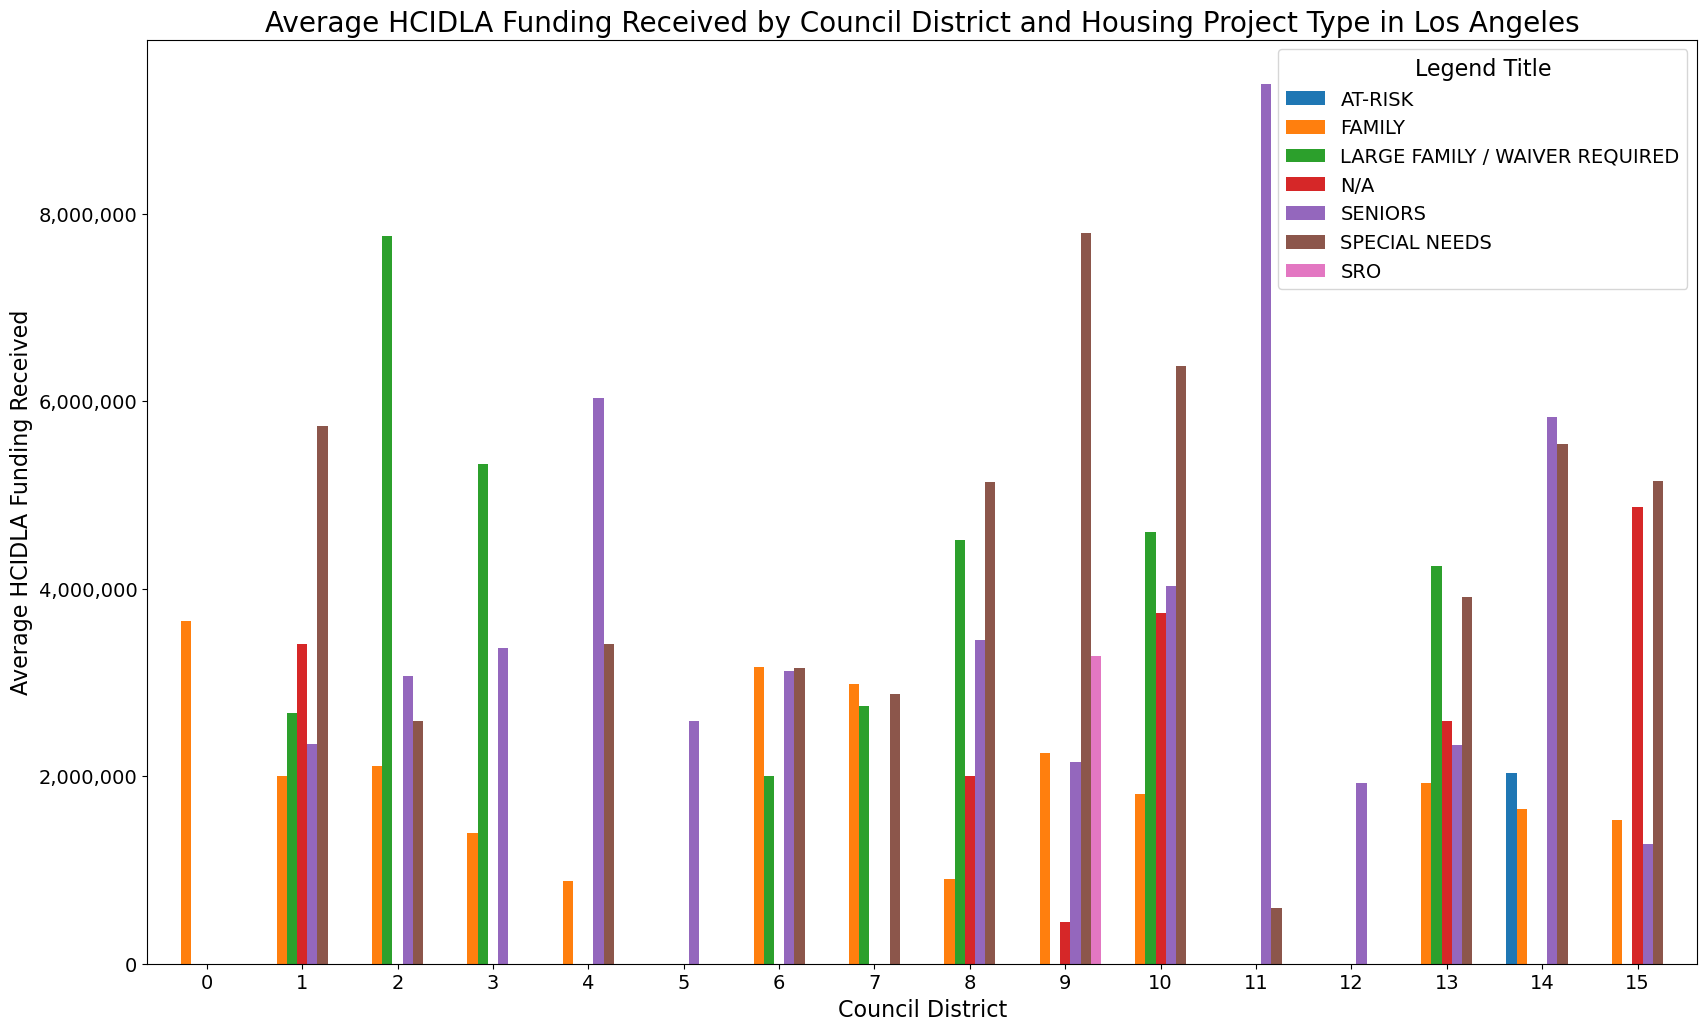

In [287]:
housing_data['council_district'] = housing_data['council_district'].astype(int)

ax = housing_data.groupby(['council_district', 'housing_type'])['hcidla_funded'].mean().unstack().plot(
    kind='bar', figsize=(20,12), width=.75)

ax.yaxis.set_major_formatter('{:,.0f}'.format)

plt.xticks(rotation=0)

legend = plt.legend(title='Housing Type', fontsize=14)
legend.set_title('Legend Title', prop={'size': 16})

ax.set_title('Average HCIDLA Funding Received by Council District and Housing Project Type in Los Angeles', fontsize=20)

ax.set_xlabel('Council District', fontsize=16)
ax.set_ylabel('Average HCIDLA Funding Received', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## This final chart shows the average HCIDLA funding recived Across all council districts in the city. Senior projects and special needs projects received higher average HCIDLA funding across all districts, with District 11 receiving the highest average contribution for any category, receiving over $800,000 for senior projects. Only District 9 received funding for an SRO (single room occupancy) project, and only District 14 recieved funding for a At-Risk project.

## For my final project I currently plan to continue exploring housing data at the census tract level. Right now I would be interested in digging down to the census tract level and merging the housing data with demographic data to better understand where affordable housing developments have been located so far, and where additional efforts are needed. If possible I would like to explore the number of units generated by each project as well, but the current data set I have does not seem to have that information. I may be able to locate it elsewhere and bring it in to the analysis.

## I may decide to pivot to exploring traffic data further, in an attempt to understand what factors influence traffic collision severity for different parties, particularly pedestrians. This would include mapping collisions and exploring the relationship between collision factors and severity levels to understand where and why people might be more likely to be killed or severely injured in a collision. 